## **Food Demand Forecasting**
### **Background information:**
There is a meal delivery company that operates in multiple cities. It has various fulfillment centers in these cities for dispatching food orders to their customers. The client needs help with demand forecasting for upcoming weeks for these centers to plan for the raw materials stocking accordingly. The replenishment of the majority of raw materials is done on a weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following dataset, the task is to predict the demand for the next 10 weeks for the center-food combinations in the test set.

### **Dataset source:**
https://www.kaggle.com/datasets/kannanaikkal/food-demand-forecasting

In [2]:
# Import relevant python libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the training datset (created during data wrangling section) into pandas dataframe
train_df = pd.read_csv('drive/MyDrive/DSC Capstone 2/train_revised.csv')

# Selecting categorical columns
categorical_cols = ['center_type', 'category', 'cuisine']

# Perform one-hot encoding
data_df_encoded = pd.get_dummies(train_df, columns=categorical_cols)

from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (Y)
X = data_df_encoded.drop('num_orders', axis=1)
Y = data_df_encoded['num_orders']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (365238, 32)
Y_train shape: (365238,)
X_test shape: (91310, 32)
Y_test shape: (91310,)


## **Model A. Linear Regression Model**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Print the coefficients
print("Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Coefficients: [ 9.01312341e-07 -1.22176650e-01 -3.75514582e-01  1.13618987e-02
 -6.59675108e-01  1.91800900e-01  2.57520075e+02  2.39489868e+02
  1.50990288e-01  6.44521286e-01  6.54188229e+01  4.07856116e+00
  1.73147446e+01 -2.13933057e+01  4.54629012e+01  1.37535785e+02
  1.33333529e+02 -1.64255834e+02  5.96932974e+01 -2.82076329e+02
 -2.67199956e+02  1.02565732e+02  6.48275103e+02  3.77875874e+01
  1.58970930e+02  2.49054982e+01 -3.72038940e+02 -2.62959305e+02
 -6.62269602e+01 -2.38357873e+02  1.20469626e+02  1.84115207e+02]
Intercept: -52.475659583649474
Mean Absolute Error (MAE): 161.33302643064724
Mean Squared Error (MSE): 88997.89628313266
Root Mean Squared Error (RMSE): 298.32515194521005


### **Linear Regression with Lasso Regularization**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+08, tolerance: 5.764e+06
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.001
Mean Absolute Error (MAE): 161.32949441985198
Mean Squared Error (MSE): 88997.86616228275
Root Mean Squared Error (RMSE): 298.32510146195
------------------------------------
Alpha: 0.01
Mean Absolute Error (MAE): 161.2978471586779
Mean Squared Error (MSE): 88997.82235974875
Root Mean Squared Error (RMSE): 298.32502804784707
------------------------------------
Alpha: 0.1
Mean Absolute Error (MAE): 161.00751849933152
Mean Squared Error (MSE): 89006.36427999164
Root Mean Squared Error (RMSE): 298.3393441703451
------------------------------------
Alpha: 1.0
Mean Absolute Error (MAE): 160.3896130387465
Mean Squared Error (MSE): 89864.31424698725
Root Mean Squared Error (RMSE): 299.7737717796326
------------------------------------
Alpha: 10.0
Mean Absolute Error (MAE): 179.3405404566937
Mean Squared Error (MSE): 105073.9218306675
Root Mean Squared Error (RMSE): 324.15107871279326
------------------------------------


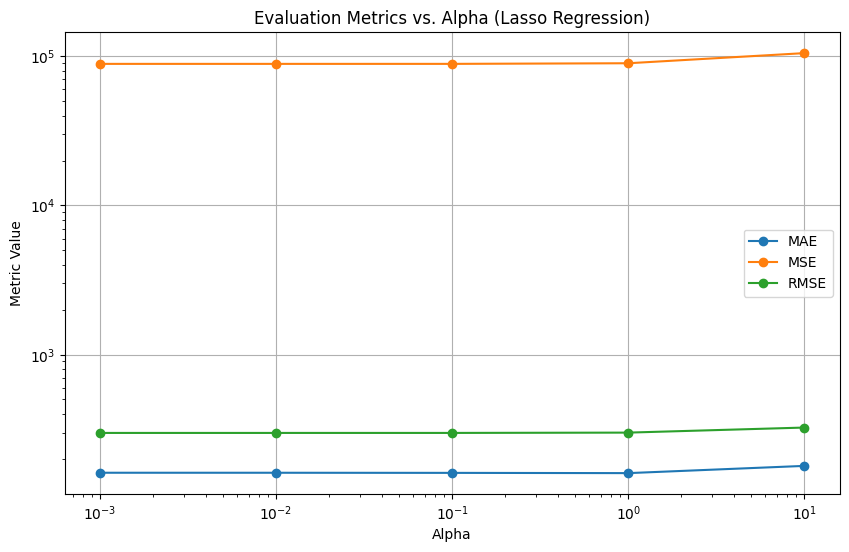

In [8]:
from sklearn.linear_model import Lasso

# Define a list of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Initialize lists to store evaluation metrics for each alpha value
mae_values = []
mse_values = []
rmse_values = []

for alpha in alpha_values:
    # Train a linear regression model with Lasso regularization
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, Y_train)

    # Make predictions on the test data with Lasso regularization
    Y_pred_lasso = lasso_model.predict(X_test)

    # Evaluate the model with Lasso regularization
    mae = mean_absolute_error(Y_test, Y_pred_lasso)
    mse = mean_squared_error(Y_test, Y_pred_lasso)
    rmse = np.sqrt(mse)

    # Append evaluation metrics to the lists
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)

    print("Alpha:", alpha)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("------------------------------------")

# Plotting the evaluation metrics for different alpha values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mae_values, marker='o', label='MAE')
plt.plot(alpha_values, mse_values, marker='o', label='MSE')
plt.plot(alpha_values, rmse_values, marker='o', label='RMSE')
plt.title('Evaluation Metrics vs. Alpha (Lasso Regression)')
plt.xlabel('Alpha')
plt.ylabel('Metric Value')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### **Ranking Features of Importance from Lasso Regression**

In [6]:
# Train a Lasso regression model with an appropriate alpha value
alpha = 0.01  # Choose an alpha value based on your previous evaluation
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, Y_train)

# Get the coefficients of the features
coefficients = lasso_model.coef_

# Create a DataFrame to store feature names and their corresponding coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute coefficient values in descending order
feature_coefficients_sorted = feature_coefficients.reindex(
    feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index
)

# Print the ranked features based on their importance
print(feature_coefficients_sorted)


                  Feature   Coefficient
22     category_Rice Bowl  6.093135e+02
26          category_Soup -4.091869e+02
29         cuisine_Indian -3.371989e+02
19  category_Other Snacks -3.194079e+02
20         category_Pasta -3.048685e+02
27      category_Starters -3.002812e+02
6   emailer_for_promotion  2.573832e+02
7       homepage_featured  2.395120e+02
17        category_Extras -2.014428e+02
28    cuisine_Continental -1.652936e+02
24      category_Sandwich  1.209033e+02
15       category_Biryani  9.858101e+01
16        category_Desert  9.444368e+01
31           cuisine_Thai  8.387122e+01
10                op_area  6.541807e+01
21         category_Pizza  6.408555e+01
13     center_type_TYPE_C -2.541232e+01
18          category_Fish  2.083944e+01
30        cuisine_Italian  2.070706e+01
25       category_Seafood -1.325987e+01
12     center_type_TYPE_B  1.319201e+01
14     category_Beverages  7.164581e+00
4          checkout_price -6.595938e-01
9             region_code  6.442926e-01


## **Model B. Random Forest Regression Model**

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Mean Absolute Error (MAE) with Random Forest Regression:", mae_rf)
print("Mean Squared Error (MSE) with Random Forest Regression:", mse_rf)
print("Root Mean Squared Error (RMSE) with Random Forest Regression:", rmse_rf)


Mean Absolute Error (MAE) with Random Forest Regression: 68.96156072719306
Mean Squared Error (MSE) with Random Forest Regression: 21726.420837683712
Root Mean Squared Error (RMSE) with Random Forest Regression: 147.3988495127547


### **Hyperparameter Optimization with Random Forest Regressor Model**

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
}

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
Y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mae_best_rf = mean_absolute_error(Y_test, Y_pred_best_rf)
mse_best_rf = mean_squared_error(Y_test, Y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)

print("\nMean Absolute Error (MAE) with Best Random Forest Regression:", mae_best_rf)
print("Mean Squared Error (MSE) with Best Random Forest Regression:", mse_best_rf)
print("Root Mean Squared Error (RMSE) with Best Random Forest Regression:", rmse_best_rf)



Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Hyperparameters: {'n_estimators': 200}

Mean Absolute Error (MAE) with Best Random Forest Regression: 68.71563032526556
Mean Squared Error (MSE) with Best Random Forest Regression: 21534.748903169697
Root Mean Squared Error (RMSE) with Best Random Forest Regression: 146.74722792328888


## **Model C. XGBoost Regressor Model**

In [13]:
import xgboost as xgb

# Create an XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(Y_test, Y_pred_xgb)
mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("Mean Absolute Error (MAE) with XGBoost Regression:", mae_xgb)
print("Mean Squared Error (MSE) with XGBoost Regression:", mse_xgb)
print("Root Mean Squared Error (RMSE) with XGBoost Regression:", rmse_xgb)

Mean Absolute Error (MAE) with XGBoost Regression: 78.07498519896193
Mean Squared Error (MSE) with XGBoost Regression: 22634.406685009097
Root Mean Squared Error (RMSE) with XGBoost Regression: 150.4473551944636


### **Hyperparameter Optimization with XGBoost Regressor Model**

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 7],           # Maximum depth of the trees
    'learning_rate': [0.05, 0.1, 0.2] # Learning rate
   }

# Create an XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
Y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
mae_best_xgb = mean_absolute_error(Y_test, Y_pred_best_xgb)
mse_best_xgb = mean_squared_error(Y_test, Y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)

print("\nMean Absolute Error (MAE) with Best XGBoost Regression:", mae_best_xgb)
print("Mean Squared Error (MSE) with Best XGBoost Regression:", mse_best_xgb)
print("Root Mean Squared Error (RMSE) with Best XGBoost Regression:", rmse_best_xgb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

Mean Absolute Error (MAE) with Best XGBoost Regression: 70.11155069374317
Mean Squared Error (MSE) with Best XGBoost Regression: 18634.898065254998
Root Mean Squared Error (RMSE) with Best XGBoost Regression: 136.50969952811045


### **XGBoost Regressor** shows the lowest RMSE and therefore, chosen as the best model

### **Features of Importance for the XGBoost Model**

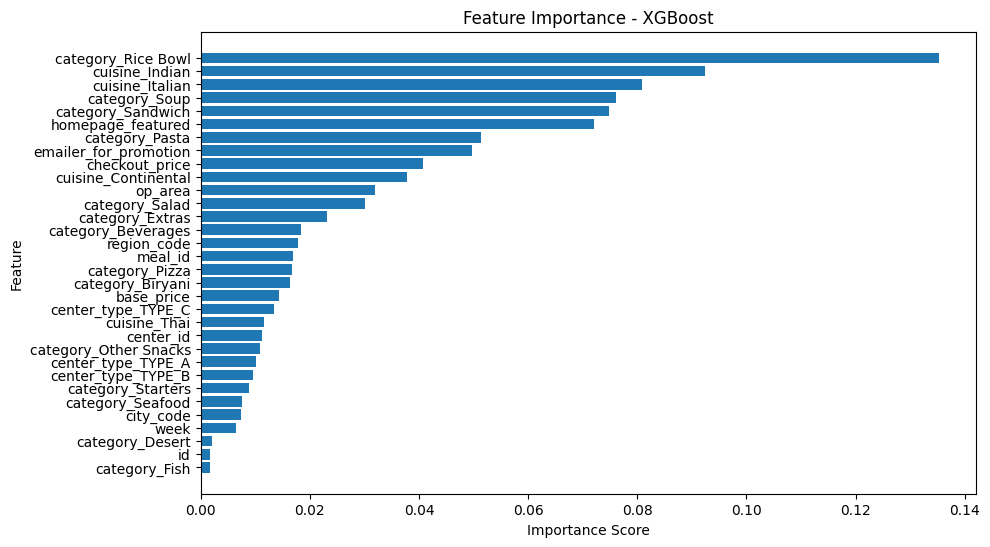

In [19]:
# Get feature importance scores from the best XGBoost model
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_sorted['Feature'], feature_importance_df_sorted['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost')
plt.show()
